## Understanding the context

The focus is on gaining insights into the reasons for the child malnutrition using data science and analysis tools. 



 **Collection of  Data:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving country_burden_seaborn_project_cleaned_dataset_20230419_1.xlsx to country_burden_seaborn_project_cleaned_dataset_20230419_1.xlsx
Saving country_diet_seaborn_project_cleaned_dataset_20230419_1.xlsx to country_diet_seaborn_project_cleaned_dataset_20230419_1.xlsx


In [78]:
# Load the Excel file
import io
df_country_burden = pd.read_excel(io
.BytesIO(uploaded['country_burden_seaborn_project_cleaned_dataset_20230419_1.xlsx']))
pd.set_option('display.max_columns', None)

df_country_diet = pd.read_excel(io.BytesIO(uploaded['country_diet_seaborn_project_cleaned_dataset_20230419_1.xlsx']))
pd.set_option('display.max_columns', None)

#df = pd.read_excel(/content/country_burden_seaborn_project_cleaned_dataset_20230419_1.xlsx)

**Preparation of the Dataset for the Country_Burden as y feature**

In [79]:
# Let's find out more imformation on our data
df_country_burden

,iso3,country,region,subregion,disaggregation,disagg.value,section,overweight_2000,overweight_2001,overweight_2002,overweight_2003,overweight_2004,overweight_2005,overweight_2006,overweight_2007,overweight_2008,overweight_2009,overweight_2010,overweight_2011,overweight_2012,overweight_2013,overweight_2014,overweight_2015,overweight_2016,overweight_2017,overweight_2018,overweight_2019,overweight_2020,overweight_2021,stunting_2000,stunting_2001,stunting_2002,stunting_2003,stunting_2004,stunting_2005,stunting_2006,stunting_2007,stunting_2008,stunting_2009,stunting_2010,stunting_2011,stunting_2012,stunting_2013,stunting_2014,stunting_2015,stunting_2016,stunting_2017,stunting_2018,stunting_2019,stunting_2020,stunting_2021,wasting_2000,wasting_2001,wasting_2002,wasting_2003,wasting_2004,wasting_2005,wasting_2006,wasting_2007,wasting_2008,wasting_2009,wasting_2010,wasting_2011,wasting_2012,wasting_2013,wasting_2014,wasting_2015,wasting_2016,wasting_2017,wasting_2018,wasting_2019,wasting_2020,wasting_2021
0,AFG,Afghanistan,Asia,Southern Asia,age,0-23 months,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.05,NaN,NaN,NaN,NaN,5.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.04,NaN,NaN,NaN,NaN,24.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.62,NaN,NaN,NaN,NaN,8.22,NaN,NaN,NaN
1,AFG,Afghanistan,Asia,Southern Asia,age,24-35 months,Burden of malnutrition,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.98,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,NaN,NaN,NaN,NaN,47.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.70,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN
2,AFG,Afghanistan,Asia,Southern Asia,age,36-47 months,Burden of malnutrition,NaN,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.11,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.13,NaN,NaN,NaN,NaN,45.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.63,NaN,NaN,NaN,NaN,2.77,NaN,NaN,NaN
3,AFG,Afghanistan,Asia,Southern Asia,age,48-59 months,Burden of malnutrition,NaN,NaN,NaN,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35,NaN,NaN,NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.19,NaN,NaN,NaN,NaN,47.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.39,NaN,NaN,NaN,NaN,2.49,NaN,NaN,NaN
4,AFG,Afghanistan,Asia,Southern Asia,all,Free from,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Highest,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,13.31,NaN,NaN,NaN,6.28,7.25,NaN,NaN,NaN,4.78,7.23,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.99,NaN,NaN,NaN,25.01,24.00,NaN,NaN,NaN,14.96,16.71,NaN,NaN,NaN,14.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.42,NaN,NaN,NaN,1.50,1.51,NaN,NaN,NaN,1.99,1.69,NaN,NaN,NaN,2.00,NaN,NaN
5902,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Lowest,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,6.89,NaN,NaN,NaN,3.05,4.68,NaN,NaN,NaN,3.65,5.09,NaN,NaN,NaN,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.88,NaN,NaN,NaN,39.31,37.07,NaN,NaN,NaN,33.39,33.10,NaN,NaN,NaN,28.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.97,NaN,NaN,NaN,3.54,3.23,NaN,NaN,NaN,4.50,4.12,NaN,NaN,NaN,3.09,NaN,NaN
5903,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Middle,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,9.34,NaN,NaN,NaN,2.86,6.19,NaN,NaN,NaN,3.39,4.90,NaN,NaN,NaN,3.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.26,NaN,NaN,NaN,35.37,35.22,N

In [80]:
y= df_country_burden.iloc[:, 7:]

In [81]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906 entries, 0 to 5905
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overweight_2000  687 non-null    float64
 1   overweight_2001  167 non-null    float64
 2   overweight_2002  168 non-null    float64
 3   overweight_2003  185 non-null    float64
 4   overweight_2004  237 non-null    float64
 5   overweight_2005  398 non-null    float64
 6   overweight_2006  550 non-null    float64
 7   overweight_2007  311 non-null    float64
 8   overweight_2008  229 non-null    float64
 9   overweight_2009  267 non-null    float64
 10  overweight_2010  533 non-null    float64
 11  overweight_2011  376 non-null    float64
 12  overweight_2012  492 non-null    float64
 13  overweight_2013  346 non-null    float64
 14  overweight_2014  544 non-null    float64
 15  overweight_2015  345 non-null    float64
 16  overweight_2016  382 non-null    float64
 17  overweight_201

**Preparation of the Dataset for the Country_Diet as X features**

In [82]:
df_country_diet

,iso3,country,region,subregion,disaggregation,disagg.value,section,continued_breastfeeding_1yr_2000,continued_breastfeeding_1yr_2001,continued_breastfeeding_1yr_2002,continued_breastfeeding_1yr_2003,continued_breastfeeding_1yr_2004,continued_breastfeeding_1yr_2005,continued_breastfeeding_1yr_2006,continued_breastfeeding_1yr_2007,continued_breastfeeding_1yr_2008,continued_breastfeeding_1yr_2009,continued_breastfeeding_1yr_2010,continued_breastfeeding_1yr_2011,continued_breastfeeding_1yr_2012,continued_breastfeeding_1yr_2013,continued_breastfeeding_1yr_2014,continued_breastfeeding_1yr_2015,continued_breastfeeding_1yr_2016,continued_breastfeeding_1yr_2017,continued_breastfeeding_1yr_2018,continued_breastfeeding_1yr_2019,continued_breastfeeding_1yr_2020,early_initiation_2000,early_initiation_2001,early_initiation_2002,early_initiation_2003,early_initiation_2004,early_initiation_2005,early_initiation_2006,early_initiation_2007,early_initiation_2008,early_initiation_2009,early_initiation_2010,early_initiation_2011,early_initiation_2012,early_initiation_2013,early_initiation_2014,early_initiation_2015,early_initiation_2016,early_initiation_2017,early_initiation_2018,early_initiation_2019,early_initiation_2020,exclusive_breastfeeding_2000,exclusive_breastfeeding_2001,exclusive_breastfeeding_2002,exclusive_breastfeeding_2003,exclusive_breastfeeding_2004,exclusive_breastfeeding_2005,exclusive_breastfeeding_2006,exclusive_breastfeeding_2007,exclusive_breastfeeding_2008,exclusive_breastfeeding_2009,exclusive_breastfeeding_2010,exclusive_breastfeeding_2011,exclusive_breastfeeding_2012,exclusive_breastfeeding_2013,exclusive_breastfeeding_2014,exclusive_breastfeeding_2015,exclusive_breastfeeding_2016,exclusive_breastfeeding_2017,exclusive_breastfeeding_2018,exclusive_breastfeeding_2019,exclusive_breastfeeding_2020,minimum_accept_diet_2009,minimum_accept_diet_2010,minimum_accept_diet_2011,minimum_accept_diet_2012,minimum_accept_diet_2013,minimum_accept_diet_2014,minimum_accept_diet_2015,minimum_accept_diet_2016,minimum_accept_diet_2017,minimum_accept_diet_2018,minimum_accept_diet_2019,minimum_accept_diet_2020,minimum_diet_diversity_2005,minimum_diet_diversity_2006,minimum_diet_diversity_2007,minimum_diet_diversity_2008,minimum_diet_diversity_2009,minimum_diet_diversity_2010,minimum_diet_diversity_2011,minimum_diet_diversity_2012,minimum_diet_diversity_2013,minimum_diet_diversity_2014,minimum_diet_diversity_2015,minimum_diet_diversity_2016,minimum_diet_diversity_2017,minimum_diet_diversity_2018,minimum_diet_diversity_2019,minimum_diet_diversity_2020,minimum_meal_2006,minimum_meal_2009,minimum_meal_2010,minimum_meal_2011,minimum_meal_2012,minimum_meal_2013,minimum_meal_2014,minimum_meal_2015,minimum_meal_2016,minimum_meal_2017,minimum_meal_2018,minimum_meal_2019,minimum_meal_2020,solid_foods_2000,solid_foods_2001,solid_foods_2002,solid_foods_2003,solid_foods_2004,solid_foods_2005,solid_foods_2006,solid_foods_2007,solid_foods_2008,solid_foods_2009,solid_foods_2010,solid_foods_2011,solid_foods_2012,solid_foods_2013,solid_foods_2014,solid_foods_2015,solid_foods_2016,solid_foods_2017,solid_foods_2018,solid_foods_2019,solid_foods_2020
0,AFG,Afghanistan,Asia,Southern Asia,age,0-1 month,Diet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Asia,Southern Asia,age,12-15 months,Diet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [83]:
X= df_country_diet.iloc[:, 8:]

In [84]:
X.columns.values

array(['continued_breastfeeding_1yr_2001',
       'continued_breastfeeding_1yr_2002',
       'continued_breastfeeding_1yr_2003',
       'continued_breastfeeding_1yr_2004',
       'continued_breastfeeding_1yr_2005',
       'continued_breastfeeding_1yr_2006',
       'continued_breastfeeding_1yr_2007',
       'continued_breastfeeding_1yr_2008',
       'continued_breastfeeding_1yr_2009',
       'continued_breastfeeding_1yr_2010',
       'continued_breastfeeding_1yr_2011',
       'continued_breastfeeding_1yr_2012',
       'continued_breastfeeding_1yr_2013',
       'continued_breastfeeding_1yr_2014',
       'continued_breastfeeding_1yr_2015',
       'continued_breastfeeding_1yr_2016',
       'continued_breastfeeding_1yr_2017',
       'continued_breastfeeding_1yr_2018',
       'continued_breastfeeding_1yr_2019',
       'continued_breastfeeding_1yr_2020', 'early_initiation_2000',
       'early_initiation_2001', 'early_initiation_2002',
       'early_initiation_2003', 'early_initiation_2004',
 

Conduct EDA

# EDA (KAWO)

In [85]:
# Combine the overweight columns into a single column
df_country_burden['overallweight'] = df_country_burden[['overweight_2000', 'overweight_2001', 'overweight_2002', 'overweight_2003', 'overweight_2004',
                       'overweight_2005', 'overweight_2006', 'overweight_2007', 'overweight_2008', 'overweight_2009',
                       'overweight_2010', 'overweight_2011', 'overweight_2012', 'overweight_2013', 'overweight_2014',
                       'overweight_2015', 'overweight_2016', 'overweight_2017', 'overweight_2018', 'overweight_2019',
                       'overweight_2020', 'overweight_2021']].mean(axis=1)

df_country_burden['overallstunting'] = df_country_burden[['stunting_2000', 'stunting_2001', 'stunting_2002', 'stunting_2003', 'stunting_2004',
                     'stunting_2005', 'stunting_2006', 'stunting_2007', 'stunting_2008', 'stunting_2009',
                     'stunting_2010', 'stunting_2011', 'stunting_2012', 'stunting_2013', 'stunting_2014',
                     'stunting_2015', 'stunting_2016', 'stunting_2017', 'stunting_2018', 'stunting_2019',
                     'stunting_2020', 'stunting_2021']].mean(axis=1)

# Combine the wasting columns into a single column
df_country_burden['overallwasting'] = df_country_burden[['wasting_2000', 'wasting_2001', 'wasting_2002', 'wasting_2003', 'wasting_2004',
                    'wasting_2005', 'wasting_2006', 'wasting_2007', 'wasting_2008', 'wasting_2009',
                    'wasting_2010', 'wasting_2011', 'wasting_2012', 'wasting_2013', 'wasting_2014',
                    'wasting_2015', 'wasting_2016', 'wasting_2017', 'wasting_2018', 'wasting_2019',
                    'wasting_2020', 'wasting_2021']].sum(axis=1)

In [86]:
df_country_burden

,iso3,country,region,subregion,disaggregation,disagg.value,section,overweight_2000,overweight_2001,overweight_2002,overweight_2003,overweight_2004,overweight_2005,overweight_2006,overweight_2007,overweight_2008,overweight_2009,overweight_2010,overweight_2011,overweight_2012,overweight_2013,overweight_2014,overweight_2015,overweight_2016,overweight_2017,overweight_2018,overweight_2019,overweight_2020,overweight_2021,stunting_2000,stunting_2001,stunting_2002,stunting_2003,stunting_2004,stunting_2005,stunting_2006,stunting_2007,stunting_2008,stunting_2009,stunting_2010,stunting_2011,stunting_2012,stunting_2013,stunting_2014,stunting_2015,stunting_2016,stunting_2017,stunting_2018,stunting_2019,stunting_2020,stunting_2021,wasting_2000,wasting_2001,wasting_2002,wasting_2003,wasting_2004,wasting_2005,wasting_2006,wasting_2007,wasting_2008,wasting_2009,wasting_2010,wasting_2011,wasting_2012,wasting_2013,wasting_2014,wasting_2015,wasting_2016,wasting_2017,wasting_2018,wasting_2019,wasting_2020,wasting_2021,overallweight,overallstunting,overallwasting
0,AFG,Afghanistan,Asia,Southern Asia,age,0-23 months,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.05,NaN,NaN,NaN,NaN,5.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.04,NaN,NaN,NaN,NaN,24.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.62,NaN,NaN,NaN,NaN,8.22,NaN,NaN,NaN,5.655000,29.205000,20.84
1,AFG,Afghanistan,Asia,Southern Asia,age,24-35 months,Burden of malnutrition,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.98,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,NaN,NaN,NaN,NaN,47.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.70,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,3.893333,53.940000,19.60
2,AFG,Afghanistan,Asia,Southern Asia,age,36-47 months,Burden of malnutrition,NaN,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.11,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.13,NaN,NaN,NaN,NaN,45.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.63,NaN,NaN,NaN,NaN,2.77,NaN,NaN,NaN,4.803333,51.983333,13.10
3,AFG,Afghanistan,Asia,Southern Asia,age,48-59 months,Burden of malnutrition,NaN,NaN,NaN,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35,NaN,NaN,NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.19,NaN,NaN,NaN,NaN,47.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.39,NaN,NaN,NaN,NaN,2.49,NaN,NaN,NaN,4.476667,50.923333,12.68
4,AFG,Afghanistan,Asia,Southern Asia,all,Free from,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Highest,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,13.31,NaN,NaN,NaN,6.28,7.25,NaN,NaN,NaN,4.78,7.23,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.99,NaN,NaN,NaN,25.01,24.00,NaN,NaN,NaN,14.96,16.71,NaN,NaN,NaN,14.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.42,NaN,NaN,NaN,1.50,1.51,NaN,NaN,NaN,1.99,1.69,NaN,NaN,NaN,2.00,NaN,NaN,6.945000,20.305000,13.11
5902,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Lowest,Burden of malnutrition,NaN,NaN,NaN,NaN,NaN,6.89,NaN,NaN,NaN,3.05,4.68,NaN,NaN,NaN,3.65,5.09,NaN,NaN,NaN,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.88,NaN,NaN,NaN,39.31,37.07,NaN,NaN,NaN,33.39,33.10,NaN,NaN,NaN,28.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.97,NaN,NaN,NaN,3.54,3.23,NaN,NaN,NaN,4.50,4.12,NaN,NaN,NaN,3.09,NaN,NaN,4.216667,34.841667,26.45
59

In [87]:
# Drop the individual overweight columns
df_country_burden_new= df_country_burden.drop(['overweight_2000', 'overweight_2001', 'overweight_2002', 'overweight_2003', 'overweight_2004',
         'overweight_2005', 'overweight_2006', 'overweight_2007', 'overweight_2008', 'overweight_2009',
         'overweight_2010', 'overweight_2011', 'overweight_2012', 'overweight_2013', 'overweight_2014',
         'overweight_2015', 'overweight_2016', 'overweight_2017', 'overweight_2018', 'overweight_2019',
         'overweight_2020', 'overweight_2021', 'stunting_2000', 'stunting_2001', 'stunting_2002', 'stunting_2003', 'stunting_2004',
         'stunting_2005', 'stunting_2006', 'stunting_2007', 'stunting_2008', 'stunting_2009',
         'stunting_2010', 'stunting_2011', 'stunting_2012', 'stunting_2013', 'stunting_2014',
         'stunting_2015', 'stunting_2016', 'stunting_2017', 'stunting_2018', 'stunting_2019',
         'stunting_2020', 'stunting_2021', 'wasting_2000', 'wasting_2001', 'wasting_2002', 'wasting_2003', 
         'wasting_2004', 'wasting_2005', 'wasting_2006', 'wasting_2007', 'wasting_2008', 'wasting_2009',
         'wasting_2010', 'wasting_2011', 'wasting_2012', 'wasting_2013', 'wasting_2014', 'wasting_2015', 
         'wasting_2016', 'wasting_2017', 'wasting_2018', 'wasting_2019', 'wasting_2020', 'wasting_2021'], 
        axis=1, inplace=True)

# Print the updated DataFrame information
df_country_burden

,iso3,country,region,subregion,disaggregation,disagg.value,section,overallweight,overallstunting,overallwasting
0,AFG,Afghanistan,Asia,Southern Asia,age,0-23 months,Burden of malnutrition,5.655000,29.205000,20.84
1,AFG,Afghanistan,Asia,Southern Asia,age,24-35 months,Burden of malnutrition,3.893333,53.940000,19.60
2,AFG,Afghanistan,Asia,Southern Asia,age,36-47 months,Burden of malnutrition,4.803333,51.983333,13.10
3,AFG,Afghanistan,Asia,Southern Asia,age,48-59 months,Burden of malnutrition,4.476667,50.923333,12.68
4,AFG,Afghanistan,Asia,Southern Asia,all,Free from,Burden of malnutrition,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
5901,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Highest,Burden of malnutrition,6.945000,20.305000,13.11
5902,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Lowest,Burden of malnutrition,4.216667,34.841667,26.45
5903,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Middle,Burden of malnutrition,5.050000,30.610000,20.87
5904,ZWE,Zimbabwe,Africa,Eastern Africa,wealth,Second highest,Burden of malnutrition,5.375000,29.136667,22.40


In [88]:
y_overallweight= df_country_burden['overallweight']
y_overallweight.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5906 entries, 0 to 5905
Series name: overallweight
Non-Null Count  Dtype  
--------------  -----  
2099 non-null   float64
dtypes: float64(1)
memory usage: 46.3 KB


<Figure size 1600x800 with 0 Axes>

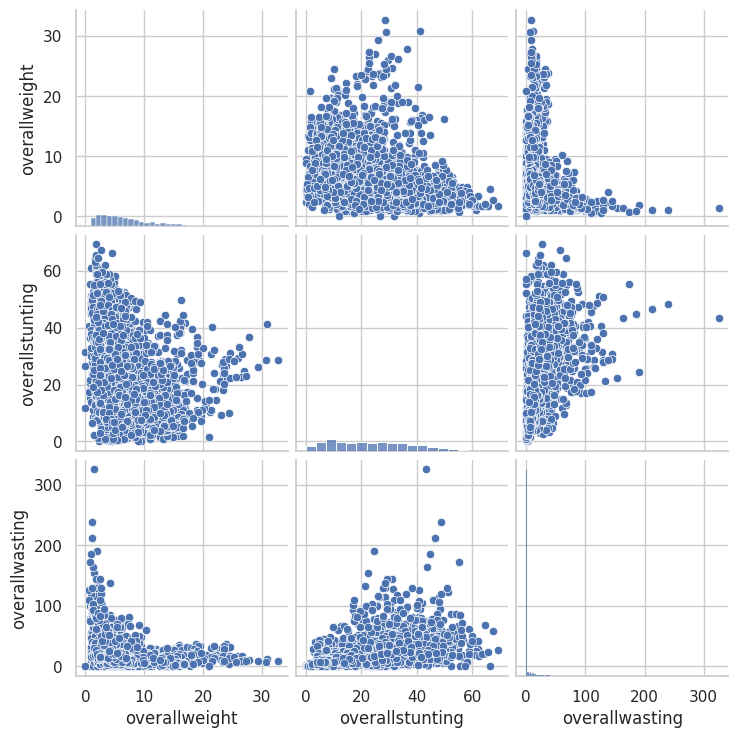

In [89]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["country","overallweight","overallstunting","overallwasting"]
sns.pairplot(df_country_burden[cols], height = 2.5 )
plt.show();

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Latin America and the Caribbean'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'Oceania')])

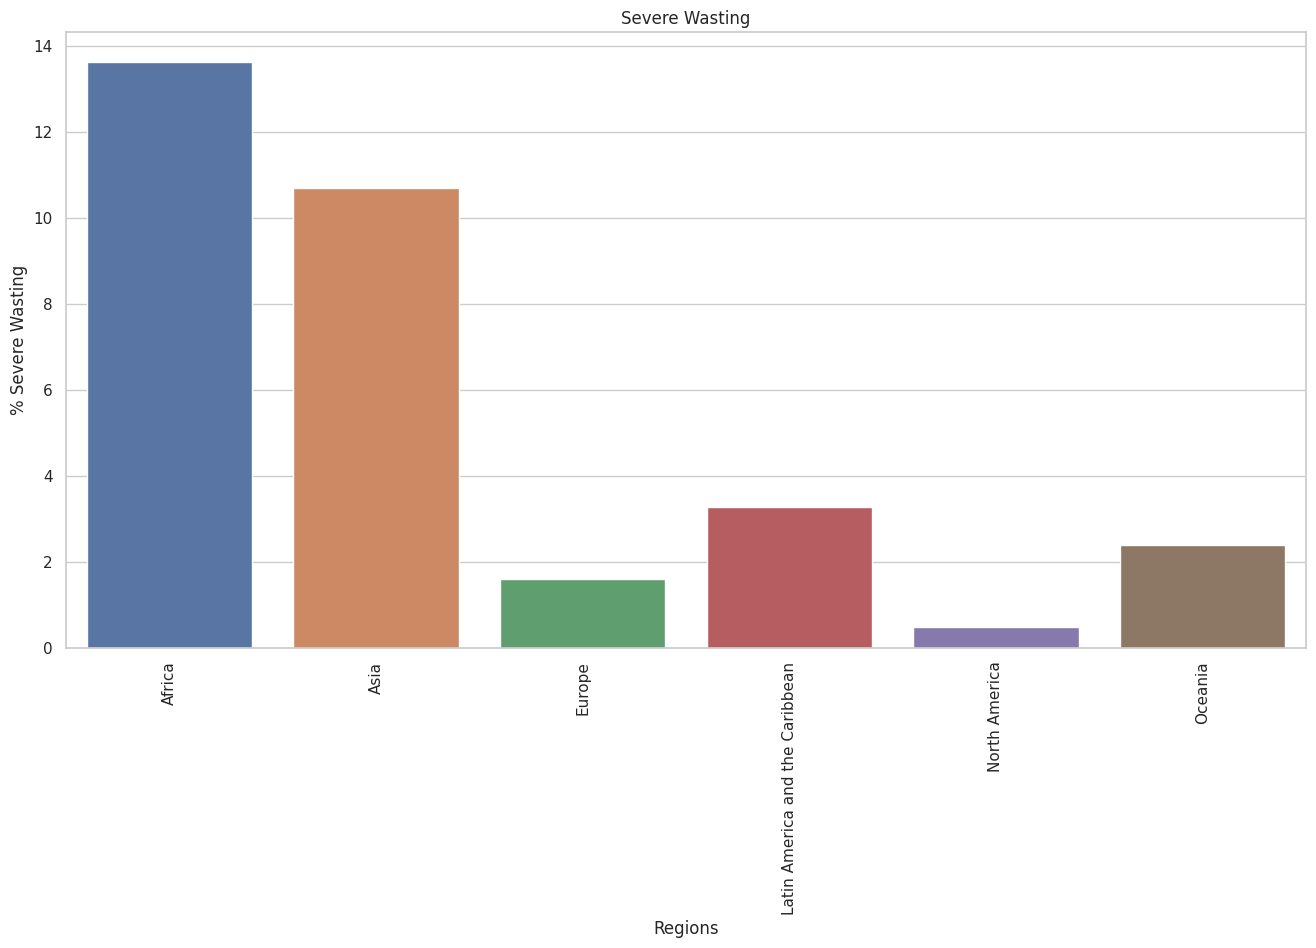

In [90]:
plt.figure(figsize=(16, 8))
x = df_country_burden.groupby(["region"])["overallwasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Severe Wasting')
ax.set_ylabel('% Severe Wasting')
ax.set_xlabel('Regions')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Latin America and the Caribbean'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'Oceania')])

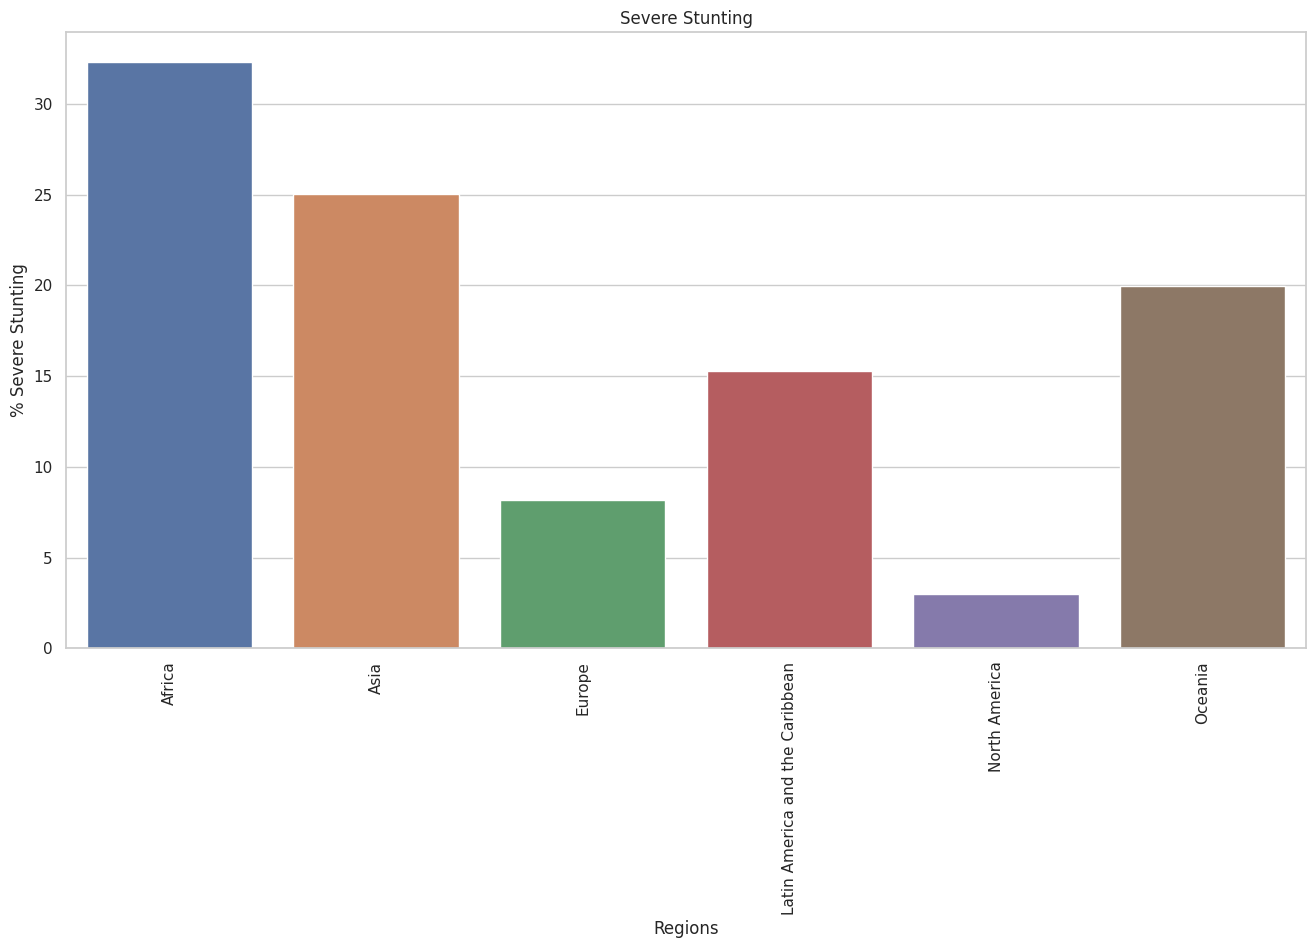

In [91]:
plt.figure(figsize=(16, 8))
x = df_country_burden.groupby(["region"])["overallstunting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Severe Stunting')
ax.set_ylabel('% Severe Stunting')
ax.set_xlabel('Regions')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Latin America and the Caribbean'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'Oceania')])

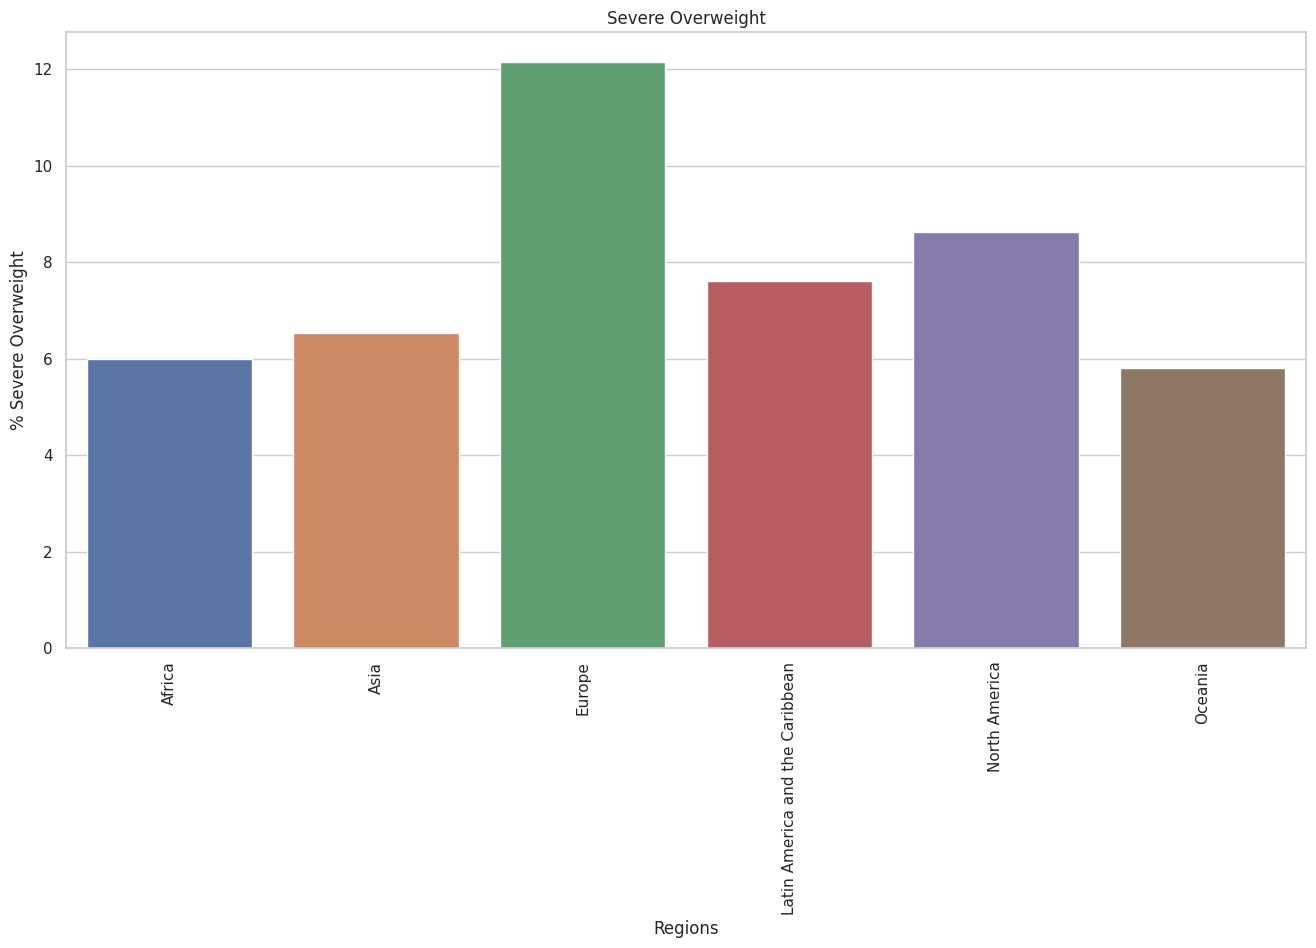

In [92]:
plt.figure(figsize=(16, 8))
x = df_country_burden.groupby(["region"])["overallweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Severe Overweight')
ax.set_ylabel('% Severe Overweight')
ax.set_xlabel('Regions')
plt.xticks(rotation = 90)

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Plotting on the WorldMap using plotly
x = df_country_burden.groupby(["country"])["overallwasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

In [94]:
#Plotting on the WorldMap using plotly
x = df_country_burden.groupby(["country"])["overallstunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Stunting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Stunting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

In [95]:
#Plotting on the WorldMap using plotly
x = df_country_burden.groupby(["country"])["overallweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Overweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Overweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

In [96]:
X= df_country_diet.iloc[:, 8:]
X

,continued_breastfeeding_1yr_2001,continued_breastfeeding_1yr_2002,continued_breastfeeding_1yr_2003,continued_breastfeeding_1yr_2004,continued_breastfeeding_1yr_2005,continued_breastfeeding_1yr_2006,continued_breastfeeding_1yr_2007,continued_breastfeeding_1yr_2008,continued_breastfeeding_1yr_2009,continued_breastfeeding_1yr_2010,continued_breastfeeding_1yr_2011,continued_breastfeeding_1yr_2012,continued_breastfeeding_1yr_2013,continued_breastfeeding_1yr_2014,continued_breastfeeding_1yr_2015,continued_breastfeeding_1yr_2016,continued_breastfeeding_1yr_2017,continued_breastfeeding_1yr_2018,continued_breastfeeding_1yr_2019,continued_breastfeeding_1yr_2020,early_initiation_2000,early_initiation_2001,early_initiation_2002,early_initiation_2003,early_initiation_2004,early_initiation_2005,early_initiation_2006,early_initiation_2007,early_initiation_2008,early_initiation_2009,early_initiation_2010,early_initiation_2011,early_initiation_2012,early_initiation_2013,early_initiation_2014,early_initiation_2015,early_initiation_2016,early_initiation_2017,early_initiation_2018,early_initiation_2019,early_initiation_2020,exclusive_breastfeeding_2000,exclusive_breastfeeding_2001,exclusive_breastfeeding_2002,exclusive_breastfeeding_2003,exclusive_breastfeeding_2004,exclusive_breastfeeding_2005,exclusive_breastfeeding_2006,exclusive_breastfeeding_2007,exclusive_breastfeeding_2008,exclusive_breastfeeding_2009,exclusive_breastfeeding_2010,exclusive_breastfeeding_2011,exclusive_breastfeeding_2012,exclusive_breastfeeding_2013,exclusive_breastfeeding_2014,exclusive_breastfeeding_2015,exclusive_breastfeeding_2016,exclusive_breastfeeding_2017,exclusive_breastfeeding_2018,exclusive_breastfeeding_2019,exclusive_breastfeeding_2020,minimum_accept_diet_2009,minimum_accept_diet_2010,minimum_accept_diet_2011,minimum_accept_diet_2012,minimum_accept_diet_2013,minimum_accept_diet_2014,minimum_accept_diet_2015,minimum_accept_diet_2016,minimum_accept_diet_2017,minimum_accept_diet_2018,minimum_accept_diet_2019,minimum_accept_diet_2020,minimum_diet_diversity_2005,minimum_diet_diversity_2006,minimum_diet_diversity_2007,minimum_diet_diversity_2008,minimum_diet_diversity_2009,minimum_diet_diversity_2010,minimum_diet_diversity_2011,minimum_diet_diversity_2012,minimum_diet_diversity_2013,minimum_diet_diversity_2014,minimum_diet_diversity_2015,minimum_diet_diversity_2016,minimum_diet_diversity_2017,minimum_diet_diversity_2018,minimum_diet_diversity_2019,minimum_diet_diversity_2020,minimum_meal_2006,minimum_meal_2009,minimum_meal_2010,minimum_meal_2011,minimum_meal_2012,minimum_meal_2013,minimum_meal_2014,minimum_meal_2015,minimum_meal_2016,minimum_meal_2017,minimum_meal_2018,minimum_meal_2019,minimum_meal_2020,solid_foods_2000,solid_foods_2001,solid_foods_2002,solid_foods_2003,solid_foods_2004,solid_foods_2005,solid_foods_2006,solid_foods_2007,solid_foods_2008,solid_foods_2009,solid_foods_2010,solid_foods_2011,solid_foods_2012,solid_foods_2013,solid_foods_2014,solid_foods_2015,solid_foods_2016,solid_foods_2017,solid_foods_2018,solid_foods_2019,solid_foods_2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [97]:
# Concatenate the datasets vertically
df_overallwasting = pd.concat([X, df_country_burden['overallwasting'].to_frame()], axis=1)
df_overallwasting

,continued_breastfeeding_1yr_2001,continued_breastfeeding_1yr_2002,continued_breastfeeding_1yr_2003,continued_breastfeeding_1yr_2004,continued_breastfeeding_1yr_2005,continued_breastfeeding_1yr_2006,continued_breastfeeding_1yr_2007,continued_breastfeeding_1yr_2008,continued_breastfeeding_1yr_2009,continued_breastfeeding_1yr_2010,continued_breastfeeding_1yr_2011,continued_breastfeeding_1yr_2012,continued_breastfeeding_1yr_2013,continued_breastfeeding_1yr_2014,continued_breastfeeding_1yr_2015,continued_breastfeeding_1yr_2016,continued_breastfeeding_1yr_2017,continued_breastfeeding_1yr_2018,continued_breastfeeding_1yr_2019,continued_breastfeeding_1yr_2020,early_initiation_2000,early_initiation_2001,early_initiation_2002,early_initiation_2003,early_initiation_2004,early_initiation_2005,early_initiation_2006,early_initiation_2007,early_initiation_2008,early_initiation_2009,early_initiation_2010,early_initiation_2011,early_initiation_2012,early_initiation_2013,early_initiation_2014,early_initiation_2015,early_initiation_2016,early_initiation_2017,early_initiation_2018,early_initiation_2019,early_initiation_2020,exclusive_breastfeeding_2000,exclusive_breastfeeding_2001,exclusive_breastfeeding_2002,exclusive_breastfeeding_2003,exclusive_breastfeeding_2004,exclusive_breastfeeding_2005,exclusive_breastfeeding_2006,exclusive_breastfeeding_2007,exclusive_breastfeeding_2008,exclusive_breastfeeding_2009,exclusive_breastfeeding_2010,exclusive_breastfeeding_2011,exclusive_breastfeeding_2012,exclusive_breastfeeding_2013,exclusive_breastfeeding_2014,exclusive_breastfeeding_2015,exclusive_breastfeeding_2016,exclusive_breastfeeding_2017,exclusive_breastfeeding_2018,exclusive_breastfeeding_2019,exclusive_breastfeeding_2020,minimum_accept_diet_2009,minimum_accept_diet_2010,minimum_accept_diet_2011,minimum_accept_diet_2012,minimum_accept_diet_2013,minimum_accept_diet_2014,minimum_accept_diet_2015,minimum_accept_diet_2016,minimum_accept_diet_2017,minimum_accept_diet_2018,minimum_accept_diet_2019,minimum_accept_diet_2020,minimum_diet_diversity_2005,minimum_diet_diversity_2006,minimum_diet_diversity_2007,minimum_diet_diversity_2008,minimum_diet_diversity_2009,minimum_diet_diversity_2010,minimum_diet_diversity_2011,minimum_diet_diversity_2012,minimum_diet_diversity_2013,minimum_diet_diversity_2014,minimum_diet_diversity_2015,minimum_diet_diversity_2016,minimum_diet_diversity_2017,minimum_diet_diversity_2018,minimum_diet_diversity_2019,minimum_diet_diversity_2020,minimum_meal_2006,minimum_meal_2009,minimum_meal_2010,minimum_meal_2011,minimum_meal_2012,minimum_meal_2013,minimum_meal_2014,minimum_meal_2015,minimum_meal_2016,minimum_meal_2017,minimum_meal_2018,minimum_meal_2019,minimum_meal_2020,solid_foods_2000,solid_foods_2001,solid_foods_2002,solid_foods_2003,solid_foods_2004,solid_foods_2005,solid_foods_2006,solid_foods_2007,solid_foods_2008,solid_foods_2009,solid_foods_2010,solid_foods_2011,solid_foods_2012,solid_foods_2013,solid_foods_2014,solid_foods_2015,solid_foods_2016,solid_foods_2017,solid_foods_2018,solid_foods_2019,solid_foods_2020,overallwasting
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.84
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.14,NaN,NaN,

In [98]:
X_df_overallwasting= df_overallwasting.iloc[:, :-1]
X_df_overallwasting

,continued_breastfeeding_1yr_2001,continued_breastfeeding_1yr_2002,continued_breastfeeding_1yr_2003,continued_breastfeeding_1yr_2004,continued_breastfeeding_1yr_2005,continued_breastfeeding_1yr_2006,continued_breastfeeding_1yr_2007,continued_breastfeeding_1yr_2008,continued_breastfeeding_1yr_2009,continued_breastfeeding_1yr_2010,continued_breastfeeding_1yr_2011,continued_breastfeeding_1yr_2012,continued_breastfeeding_1yr_2013,continued_breastfeeding_1yr_2014,continued_breastfeeding_1yr_2015,continued_breastfeeding_1yr_2016,continued_breastfeeding_1yr_2017,continued_breastfeeding_1yr_2018,continued_breastfeeding_1yr_2019,continued_breastfeeding_1yr_2020,early_initiation_2000,early_initiation_2001,early_initiation_2002,early_initiation_2003,early_initiation_2004,early_initiation_2005,early_initiation_2006,early_initiation_2007,early_initiation_2008,early_initiation_2009,early_initiation_2010,early_initiation_2011,early_initiation_2012,early_initiation_2013,early_initiation_2014,early_initiation_2015,early_initiation_2016,early_initiation_2017,early_initiation_2018,early_initiation_2019,early_initiation_2020,exclusive_breastfeeding_2000,exclusive_breastfeeding_2001,exclusive_breastfeeding_2002,exclusive_breastfeeding_2003,exclusive_breastfeeding_2004,exclusive_breastfeeding_2005,exclusive_breastfeeding_2006,exclusive_breastfeeding_2007,exclusive_breastfeeding_2008,exclusive_breastfeeding_2009,exclusive_breastfeeding_2010,exclusive_breastfeeding_2011,exclusive_breastfeeding_2012,exclusive_breastfeeding_2013,exclusive_breastfeeding_2014,exclusive_breastfeeding_2015,exclusive_breastfeeding_2016,exclusive_breastfeeding_2017,exclusive_breastfeeding_2018,exclusive_breastfeeding_2019,exclusive_breastfeeding_2020,minimum_accept_diet_2009,minimum_accept_diet_2010,minimum_accept_diet_2011,minimum_accept_diet_2012,minimum_accept_diet_2013,minimum_accept_diet_2014,minimum_accept_diet_2015,minimum_accept_diet_2016,minimum_accept_diet_2017,minimum_accept_diet_2018,minimum_accept_diet_2019,minimum_accept_diet_2020,minimum_diet_diversity_2005,minimum_diet_diversity_2006,minimum_diet_diversity_2007,minimum_diet_diversity_2008,minimum_diet_diversity_2009,minimum_diet_diversity_2010,minimum_diet_diversity_2011,minimum_diet_diversity_2012,minimum_diet_diversity_2013,minimum_diet_diversity_2014,minimum_diet_diversity_2015,minimum_diet_diversity_2016,minimum_diet_diversity_2017,minimum_diet_diversity_2018,minimum_diet_diversity_2019,minimum_diet_diversity_2020,minimum_meal_2006,minimum_meal_2009,minimum_meal_2010,minimum_meal_2011,minimum_meal_2012,minimum_meal_2013,minimum_meal_2014,minimum_meal_2015,minimum_meal_2016,minimum_meal_2017,minimum_meal_2018,minimum_meal_2019,minimum_meal_2020,solid_foods_2000,solid_foods_2001,solid_foods_2002,solid_foods_2003,solid_foods_2004,solid_foods_2005,solid_foods_2006,solid_foods_2007,solid_foods_2008,solid_foods_2009,solid_foods_2010,solid_foods_2011,solid_foods_2012,solid_foods_2013,solid_foods_2014,solid_foods_2015,solid_foods_2016,solid_foods_2017,solid_foods_2018,solid_foods_2019,solid_foods_2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [26]:
#Instead of using fillna, we use SimpleImputer here
#X = X.fillna(0)
#X

In [99]:
#Handling missing data
from sklearn.impute import SimpleImputer

#Imputer object using the mean strategy and missing_values type for imputation
imputer= SimpleImputer(missing_values= np.nan, strategy='mean')
imputer= imputer.fit(X_df_overallwasting)
X_df_overallwasting= imputer.transform(X_df_overallwasting)

In [100]:
y_df_overallwasting= df_overallwasting['overallwasting']
y_df_overallwasting

0       20.84
1       19.60
2       13.10
3       12.68
4        0.00
        ...  
5901    13.11
5902    26.45
5903    20.87
5904    22.40
5905    24.85
Name: overallwasting, Length: 5906, dtype: float64

In [101]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df_overallwasting, y_df_overallwasting, test_size=0.2, random_state=42)

In [102]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train.shape, X_test.shape

((4724, 124), (1182, 124))

In [103]:
# Check the shape of X_train and y_train
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4724, 124)
(1182, 124)
(4724,)
(1182,)


In [104]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history= model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [105]:
model_1.evaluate(X_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 7.9043 - mae: 7.9043


[7.9043192863464355, 7.9043192863464355]

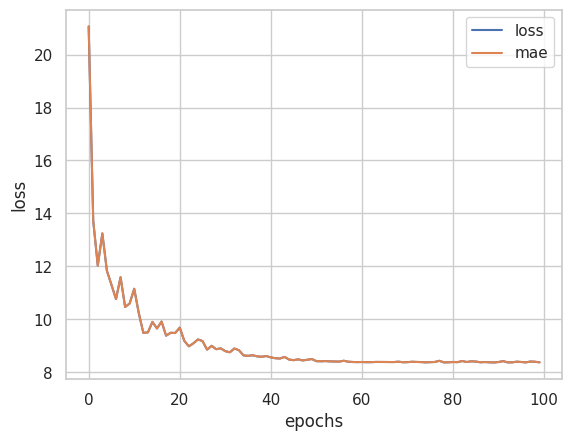

In [106]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [107]:
# Try training for a little longer (500 more epochs)
history_2 = model_1.fit(X_train, y_train, epochs=500, verbose=0) 

In [108]:
# Evaluate the model trained for 500 total epochs
model_2_loss, model_2_mae = model_1.evaluate(X_test, y_test)
model_2_loss, model_2_mae

37/37 [==============================] - 0s 3ms/step - loss: 7.8388 - mae: 7.8388


(7.838763236999512, 7.838763236999512)

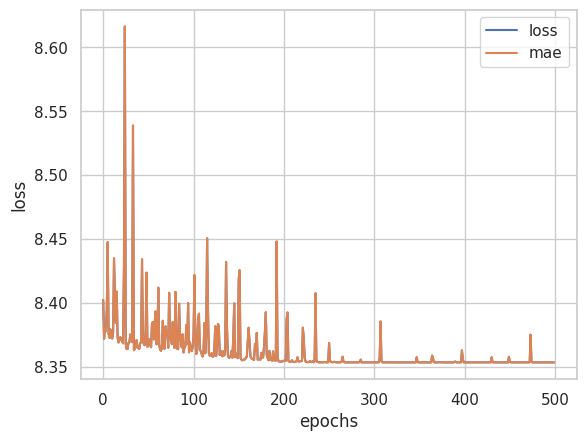

In [109]:

# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable
     

In [110]:
import tensorflow as tf

# Assume X_train_padded has a shape of (num_samples, max_length)
# and y_train has a shape of (num_samples,)

# Reshape X_train_padded to add a third dimension
max_length = 100

# Define your model as usual
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 5, activation='relu', input_shape=(124, 1)),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model as usual
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Fit the model with the reshaped input data
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
148/148 [==============================] - 2s 8ms/step - loss: 8.3533 - mae: 8.3533
Epoch 2/100
148/148 [==============================] - 1s 8ms/step - loss: 8.3533 - mae: 8.3533
Epoch 3/100
148/148 [==============================] - 2s 11ms/step - loss: 8.3533 - mae: 8.3533
Epoch 4/100
148/148 [==============================] - 2s 12ms/step - loss: 8.3533 - mae: 8.3533
Epoch 5/100
148/148 [==============================] - 2s 12ms/step - loss: 8.3533 - mae: 8.3533
Epoch 6/100
148/148 [==============================] - 1s 9ms/step - loss: 8.3533 - mae: 8.3533
Epoch 7/100
148/148 [==============================] - 1s 8ms/step - loss: 8.3533 - mae: 8.3533
Epoch 8/100
148/148 [==============================] - 1s 8ms/step - loss: 8.3533 - mae: 8.3533
Epoch 9/100
148/148 [==============================] - 1s 8ms/step - loss: 8.3533 - mae: 8.3533
Epoch 10/100
148/148 [==============================] - 1s 8ms/step - loss: 8.3533 - mae: 8.3533
Epoch 11/100
148/148 [==============

In [111]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 120, 32)           192       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 40, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 32)            5152      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [112]:
# Make predictions
y_preds = model.predict(X_test)

37/37 [==============================] - 0s 3ms/step


In [113]:
y_preds

array([[9.7146672e-13],
       [3.8894300e-12],
       [3.8894300e-12],
       ...,
       [3.8894300e-12],
       [1.1909472e-12],
       [3.8894300e-12]], dtype=float32)

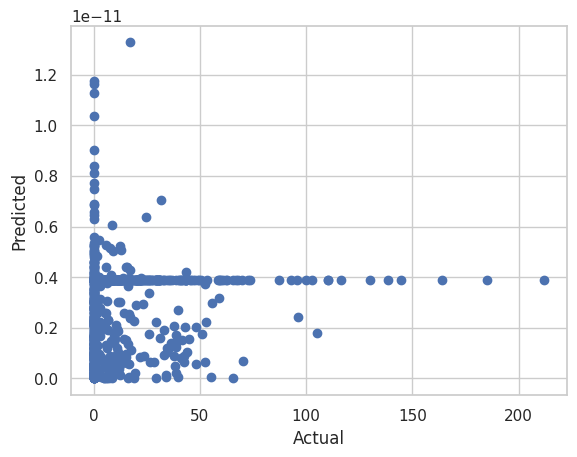

In [114]:
# Plot the actual test labels against the predicted labels
plt.scatter(y_test, y_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [115]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """

In [116]:
train_data = X_train[:,0]
train_labels = y_train
test_data = X_test[:,0]
test_labels = y_test
predictions = model.predict(X_test)

37/37 [==============================] - 0s 4ms/step


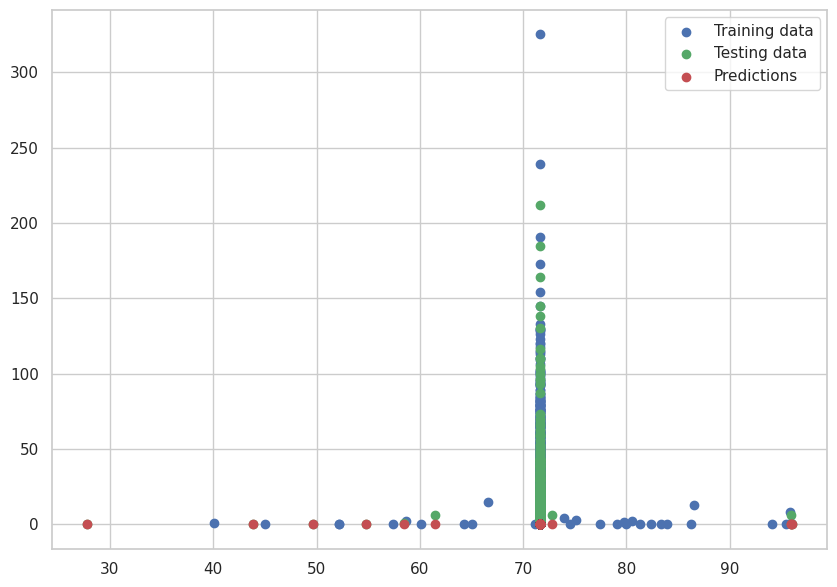

In [117]:
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

Machine Learning for Regression Model